In [4]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving penguins.csv to penguins.csv


In [5]:
penguins = pd.read_csv('penguins.csv')
penguins

,Species,BeakLength,BeakDepth,FlipperLength,BodyMass
0,Adelie,39.1,18.7,181,3750
1,Adelie,39.5,17.4,186,3800
2,Adelie,40.3,18.0,195,3250
3,Adelie,36.7,19.3,193,3450
4,Adelie,39.3,20.6,190,3650
...,...,...,...,...,...
337,Gentoo,47.2,13.7,214,4925
338,Gentoo,46.8,14.3,215,4850
339,Gentoo,50.4,15.7,222,5750
340,Gentoo,45.2,14.8,212,5200


In [54]:
X = penguins[['BeakLength', 'BeakDepth', 'FlipperLength', 'BodyMass']]
y = penguins['Species']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_tn_std = std_scale.transform(X_train)
X_te_std = std_scale.transform(X_test)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

In [58]:
print(X_tn_std.shape)
print(X_tn_pca.shape)

(256, 4)
(256, 2)


In [74]:
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, 
                           columns=pca_columns)
y_tn = y_train.to_numpy()
X_tn_pca_df['target'] = y_tn
X_tn_pca_df

,pca_comp1,pca_comp2,target
0,-2.059789,-0.395383,Adelie
1,-0.769367,-0.205328,Chinstrap
2,1.762191,-0.160041,Gentoo
3,-1.816328,-0.712135,Adelie
4,-1.538791,-0.674351,Adelie
...,...,...,...
251,2.472782,-0.256444,Gentoo
252,-0.773698,-0.574726,Adelie
253,-1.727952,-0.120788,Adelie
254,-0.748975,0.317885,Chinstrap


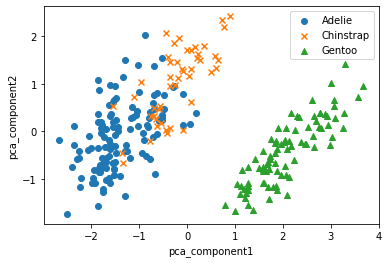

In [75]:
import matplotlib.pyplot as plt

pca_df = X_tn_pca_df
df_0 = pca_df[pca_df['target']=='Adelie']
df_1 = pca_df[pca_df['target']=='Chinstrap']
df_2 = pca_df[pca_df['target']=='Gentoo']

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

plt.scatter(X_11, X_21, 
            marker='o', 
            label='Adelie')
plt.scatter(X_12, X_22, 
            marker='x', 
            label='Chinstrap')
plt.scatter(X_13, X_23, 
            marker='^', 
            label='Gentoo')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, 
                                random_state=0)
clf_rf.fit(X_tn_std, y_tn)

pred_rf = clf_rf.predict(X_te_std)

In [80]:
from sklearn.metrics import accuracy_score

y_te = y_test.to_numpy()
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9534883720930233


In [83]:
clf_rf_pca = RandomForestClassifier(max_depth=2, 
                                    random_state=0)
clf_rf_pca.fit(X_tn_pca, y_tn)

pred_rf_pca = clf_rf_pca.predict(X_te_pca)

In [84]:
accuracy_pca = accuracy_score(y_te, pred_rf_pca)
print(accuracy_pca)

0.8372093023255814


In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y_tn = y_train.to_numpy()
lda = LinearDiscriminantAnalysis()
lda.fit(X_tn_std, y_tn)
X_tn_lda = lda.transform(X_tn_std)
X_te_lda = lda.transform(X_te_std)

In [86]:
print(X_tn_std.shape)
print(X_tn_lda.shape)

(256, 4)
(256, 2)


In [87]:
lda_columns = ['lda_comp1', 'lda_comp2']
X_tn_lda_df = pd.DataFrame(X_tn_lda, 
                           columns=lda_columns)
X_tn_lda_df['target'] = y_tn
X_tn_lda_df

,lda_comp1,lda_comp2,target
0,4.250629,3.102804,Adelie
1,1.155025,-2.550611,Chinstrap
2,-4.008128,0.626154,Gentoo
3,3.185424,2.233571,Adelie
4,2.671447,2.767240,Adelie
...,...,...,...
251,-5.725227,1.134088,Gentoo
252,1.046404,1.343899,Adelie
253,3.759206,2.042073,Adelie
254,1.805610,-2.350223,Chinstrap


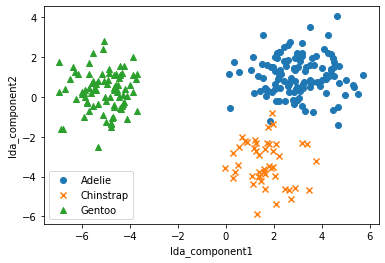

In [88]:
lda_df = X_tn_lda_df
df_0 = lda_df[lda_df['target']=='Adelie']
df_1 = lda_df[lda_df['target']=='Chinstrap']
df_2 = lda_df[lda_df['target']=='Gentoo']

X_11 = df_0['lda_comp1']
X_12 = df_1['lda_comp1']
X_13 = df_2['lda_comp1']

X_21 = df_0['lda_comp2']
X_22 = df_1['lda_comp2']
X_23 = df_2['lda_comp2']

plt.scatter(X_11, X_21, 
            marker='o', 
            label='Adelie')
plt.scatter(X_12, X_22, 
            marker='x', 
            label='Chinstrap')
plt.scatter(X_13, X_23, 
            marker='^', 
            label='Gentoo')
plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

In [89]:
clf_rf_lda = RandomForestClassifier(max_depth=2, 
                                    random_state=0)
clf_rf_lda.fit(X_tn_lda, y_tn)

pred_rf_lda = clf_rf_lda.predict(X_te_lda)

In [90]:
accuracy_lda = accuracy_score(y_te, pred_rf_lda)
print(accuracy_lda)

0.9534883720930233
